In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# -----------------------------------------------------
# 1. IMPORT DATA INTO DATAFRAME
# -----------------------------------------------------
df = pd.read_csv("Sample_Data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], dayfirst=True)

# 5 point moving average
df["MA5"] = df["Values"].rolling(5).mean()


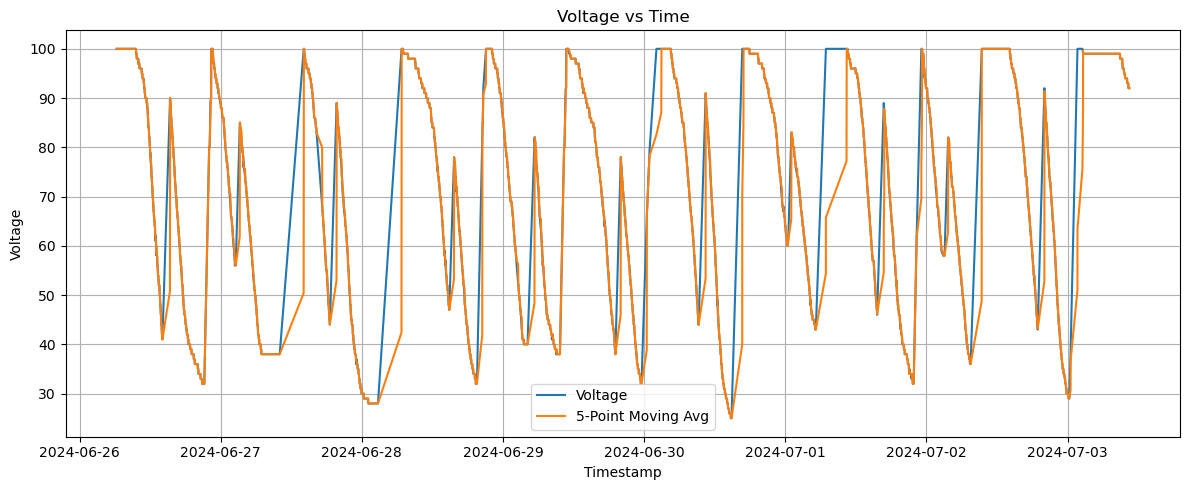

In [7]:
# -----------------------------------------------------
# 2. PLOT THE CHART
# -----------------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(df["Timestamp"], df["Values"], label="Voltage")
plt.plot(df["Timestamp"], df["MA5"], label="5-Point Moving Avg")
plt.xlabel("Timestamp")
plt.ylabel("Voltage")
plt.title("Voltage vs Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# -----------------------------------------------------
# 3. FIND LOCAL PEAKS (High points) AND LOWS (Valleys)
# -----------------------------------------------------
peaks = df[(df["Values"] > df["Values"].shift(1)) &
           (df["Values"] > df["Values"].shift(-1))]

lows = df[(df["Values"] < df["Values"].shift(1)) &
          (df["Values"] < df["Values"].shift(-1))]

print("\n--- Local High Points (Peaks) ---")
print(peaks[["Timestamp", "Values"]])

print("\n--- Local Low Points (Lows) ---")
print(lows[["Timestamp", "Values"]])



--- Local High Points (Peaks) ---
                Timestamp  Values
557   2024-06-26 11:49:49      83
603   2024-06-26 12:01:22      79
798   2024-06-26 12:55:48      62
2866  2024-06-27 00:33:37      85
3198  2024-06-27 03:54:40      77
3412  2024-06-27 05:04:45      62
3677  2024-06-27 06:20:57      43
3811  2024-06-27 06:55:03      39
4153  2024-06-27 15:26:26      93
4256  2024-06-27 15:52:50      87
4783  2024-06-27 20:38:54      74
6308  2024-06-28 11:30:47      89
6797  2024-06-28 14:04:12      59
6834  2024-06-28 14:13:17      57
7123  2024-06-28 16:34:47      64
7309  2024-06-28 17:29:11      49
7328  2024-06-28 17:34:08      48
7420  2024-06-28 17:58:54      43
7570  2024-06-28 18:36:50      37
9136  2024-06-29 05:25:30      82
9284  2024-06-29 06:47:13      57
11097 2024-06-29 17:07:55      67
11936 2024-06-29 22:02:01      48
12763 2024-06-30 06:06:26      89
13726 2024-06-30 12:02:43      60
13816 2024-06-30 12:28:17      49
14011 2024-06-30 13:19:58      34
15115 2024-06

In [14]:

# -----------------------------------------------------
# 4. FIND WHEN VOLTAGE DROPS BELOW 20
# -----------------------------------------------------
below_20 = df[df["Values"] < 20]
print("\n--- Voltage Below 20 ---")
print(below_20[["Timestamp", "Values"]])


# -----------------------------------------------------
# BONUS: Detect accelerating downward slope
# Logic: slope is negative AND slope is becoming more negative
# -----------------------------------------------------
df["diff1"] = df["Values"].diff()
df["diff2"] = df["diff1"].diff()

down_accel = df[(df["diff1"] < 0) & (df["diff2"] < 0)]

print("\n--- Accelerating Downward Points ---")
print(down_accel[["Timestamp", "Values"]])



--- Voltage Below 20 ---
Empty DataFrame
Columns: [Timestamp, Values]
Index: []

--- Accelerating Downward Points ---
                Timestamp  Values
36    2024-06-26 09:36:30      99
60    2024-06-26 09:42:33      98
120   2024-06-26 09:57:38      97
125   2024-06-26 09:58:47      97
174   2024-06-26 10:11:06      96
...                   ...     ...
21687 2024-07-03 09:21:12      96
21732 2024-07-03 09:34:56      95
21769 2024-07-03 09:44:50      94
21831 2024-07-03 10:07:38      93
21877 2024-07-03 10:20:17      92

[1187 rows x 2 columns]
